In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.pyplot as plt
from typing import List, Tuple
from tqdm import tqdm

In [16]:
G = nx.Graph()
G.add_edges_from([(1, 5), (1, 6), (1, 7), (1, 8),
                  (2, 4), (2, 6), (2, 7), (2, 8),
                  (3, 4), (3, 5), (3, 7), (3, 8),
                  (4, 5), (4, 6), (4, 8), (5, 6),
                  (5, 7), (6, 7)])

G_complement = nx.complement(G)


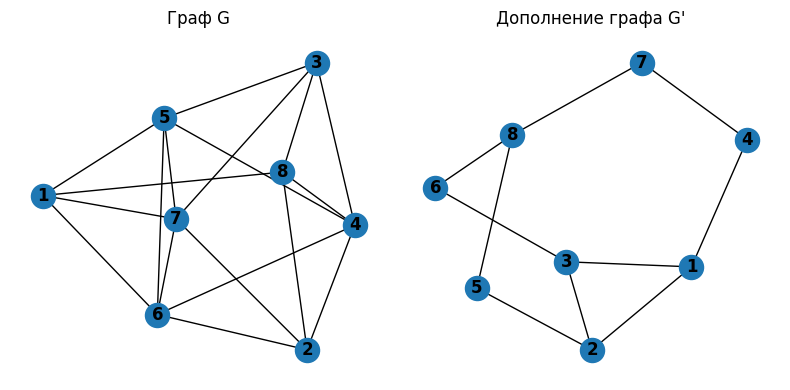

In [17]:

# Рисование графов
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
nx.draw(G, with_labels=True, font_weight='bold')
plt.title('Граф G')

plt.subplot(1, 2, 2)
nx.draw(G_complement, with_labels=True, font_weight='bold')
plt.title('Дополнение графа G\'')

plt.tight_layout()
plt.show()

В графе'G G существует вершинное покрытие размера k’=|V|-k <=> в
графе G существует клика размера k

In [26]:
from typing import List, Tuple, Literal

x = Literal['x1', 'x2', 'x3', '-x1', '-x2', '-x3']
Dez = Tuple[x, x, x]
def create_graph_from_dez(dezs: List[Dez]) -> nx.Graph:
    g = nx.Graph()
    for i in range(1, len(dezs)):
        for j in range(len(dezs[i-1])):
            for k in range(len(dezs[i])):
                if j != k or dezs[i-1][j] == dezs[i][k]:
                    g.add_edge(f'{dezs[i-1][j]}-{i-1}', f'{dezs[i][k]}-{i}')
    
    return g

In [27]:
f = [('x1','-x2','x3'),
     ('-x1','-x2', 'x3')]
g = create_graph_from_dez(f)
g_complement = nx.complement(g)
len(g.edges())

8

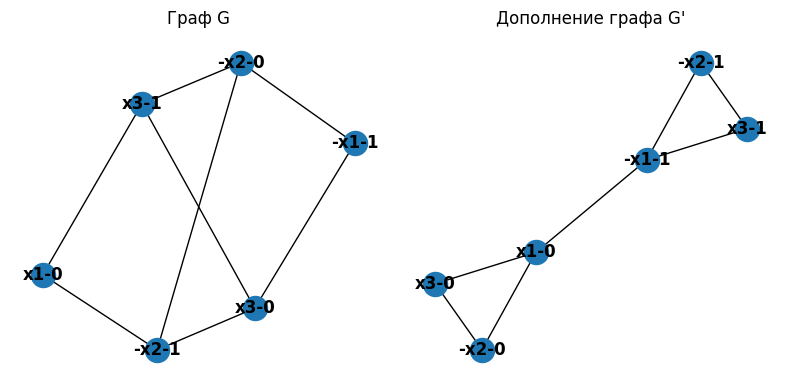

In [28]:
# Рисование графов
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
nx.draw(g, with_labels=True, font_weight='bold')
plt.title('Граф G')

plt.subplot(1, 2, 2)
nx.draw(g_complement, with_labels=True, font_weight='bold')
plt.title('Дополнение графа G\'')

plt.tight_layout()
plt.show()

если существет вершинное покрытие размером 4, то формула выполнима

In [29]:
import numpy as np
A = np.array([0])
t = 308
S = [104, 102, 201, 101]
for el in S:
    B = A + el
    A = np.sort(np.concatenate((A, B)))
    index = np.searchsorted(A , t, side='right')
    A = A[:index]
    
print(A)
    

[  0 101 102 104 201 203 205 206 302 303 305 307]


In [30]:
def get_sum(S: List[int], t: int) -> int:
    A = np.array([0])
    for el in S:
        B = A + el
        A = np.sort(np.concatenate((A, B)))
        index = np.searchsorted(A , t, side='right')
        A = A[:index]
        
    return A[-1]

In [31]:
t = 308
S = [104, 102, 201, 101]
get_sum(S, t)

307

In [32]:
import numpy as np
import time
import matplotlib.pyplot as plt

def measure_time(n_elements, mesure= 3):
    """
    Генерирует массив, вычисляет сумму его элементов и 
    замеряет время выполнения функции get_sum.

    Args:
        n_elements: Количество элементов в массиве.

    Returns:
        Время выполнения функции get_sum в секундах.
    """
    # Генерируем массив согласно нормальному распределению
    S = np.random.normal(loc=100, scale=50, size=n_elements).astype(int)

    # Вычисляем целевое значение t как половину суммы всех элементов
    t = sum(S) // 2

    # Замеряем время выполнения get_sum
    start_time = time.time()
    for _ in range(mesure):
        _ = get_sum(S, t)
    end_time = time.time()

    return (end_time - start_time)/mesure

In [ ]:
array_size = []
t = []
for i in tqdm(range(5, 30, 1)):
    array_size.append(i)
    t.append(measure_time(i, 3))
    

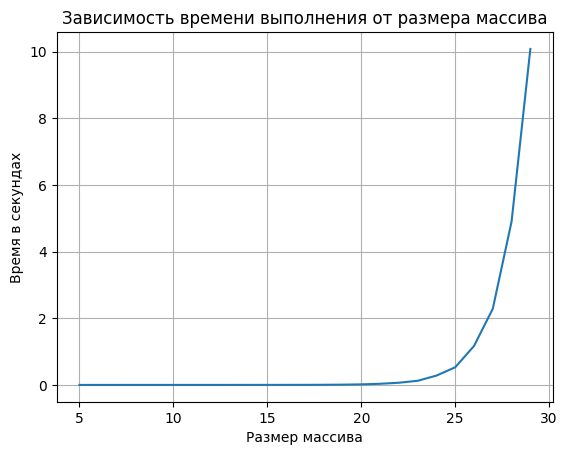

In [34]:
plt.plot(array_size,t)
plt.xlabel('Размер массива')
plt.ylabel('Время в секундах')
plt.title('Зависимость времени выполнения от размера массива')
plt.grid(True)  # Добавляем сетку
plt.show()

In [2]:
from typing import List
def reduction(A:List[int], b: float) -> np.ndarray:
    red = [A[0]]
    last = A[0]
    for el in A:
        if last < (1 - b) * el:
            red.append(el)
            last = el
    
    return np.array(red)
            
def get_sum_approximate(S:List[int], t: int, eps: float = 0.2):
    A = np.array([0])
    for el in S:
        B = A + el
        A = np.sort(np.concatenate((A, B)))
        A = reduction(A, eps/len(S))
        index = np.searchsorted(A , t, side='right')
        A = A[:index]
        
    return A[-1]

t = 308
S = [104, 102, 201, 101]
get_sum_approximate(S, t)

302

In [19]:
import gc

def measure_time_approximate(n_elements, mesure= 3, eps=0.2):
    """
    Генерирует массив, вычисляет сумму его элементов и 
    замеряет время выполнения функции get_sum.

    Args:
        n_elements: Количество элементов в массиве.

    Returns:
        Время выполнения функции get_sum в секундах.
    """
    gc.collect()
    # Генерируем массив согласно нормальному распределению
    S = np.random.randint(1, 200, size=n_elements)

    # Вычисляем целевое значение t как половину суммы всех элементов
    t = sum(S) // 2

    # Замеряем время выполнения get_sum
    start_time = time.time()
    for _ in range(mesure):
        _ = get_sum_approximate(S, t, eps)
    end_time = time.time()

    return (end_time - start_time)/mesure

In [12]:
array_size = []
t = []
from tqdm import tqdm
for i in tqdm(range(30, 300+1, 30)):
    array_size.append(i)
    t.append(measure_time_approximate(i, 3))

100%|██████████| 10/10 [02:00<00:00, 12.06s/it]


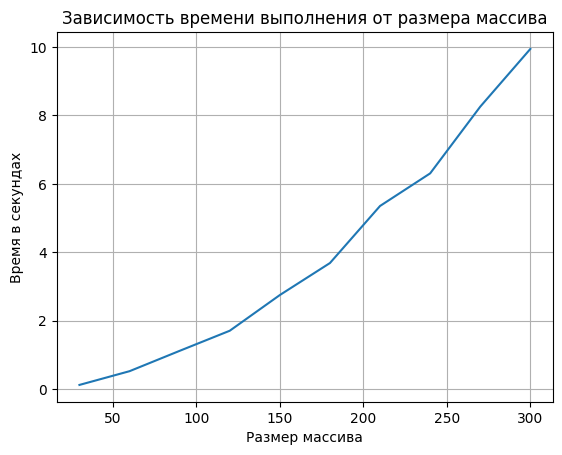

In [13]:
plt.plot(array_size,t)
plt.xlabel('Размер массива')
plt.ylabel('Время в секундах')
plt.title('Зависимость времени выполнения от размера массива')
plt.grid(True)  # Добавляем сетку
plt.show()

In [38]:
e = []
t = []
from tqdm import tqdm
for i in tqdm(np.arange(5, 50, 5)):
    e.append(i)
    t.append(measure_time_approximate(500, 3, 1/i))

100%|██████████| 9/9 [04:20<00:00, 28.92s/it]


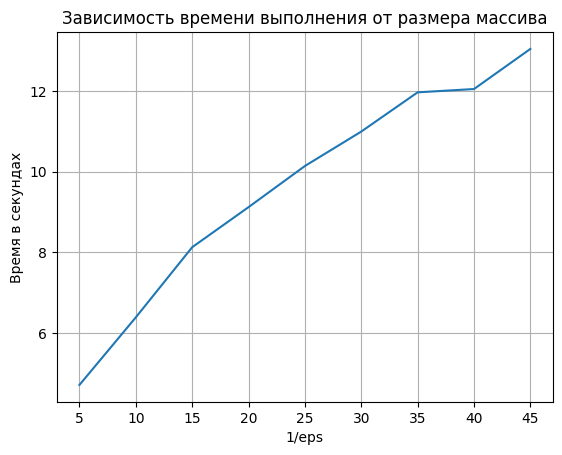

In [40]:
plt.plot(e,t)
plt.xlabel('1/eps')
plt.ylabel('Время в секундах')
plt.title('Зависимость времени выполнения от размера массива')
plt.grid(True)  # Добавляем сетку
plt.show()